In [1]:
!pip install qiskit

     |████████████████████████████████| 6.1 MB 4.4 MB/s 
     |████████████████████████████████| 17.9 MB 103 kB/s 
     |████████████████████████████████| 235 kB 58.0 MB/s 
     |████████████████████████████████| 207 kB 45.3 MB/s 
     |████████████████████████████████| 2.1 MB 23.0 MB/s 
     |████████████████████████████████| 207 kB 35.9 MB/s 
     |████████████████████████████████| 634 kB 58.8 MB/s 
     |████████████████████████████████| 1.4 MB 39.4 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 943 kB 48.4 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 3.5 MB 24.0 MB/s 
     |████████████████████████████████| 6.3 MB 22.0 MB/s 
  Created wheel for qiskit: filename=qiskit-0.30.1-py3-none-any.whl size=11697 sha256=79396de690128d523f5029ef306748c962196153520a7138573fe8ada5719dd2
  Stored in directory: /root/.cache/pip/whe

In [2]:
!pip install pylatexenc

     |████████████████████████████████| 162 kB 5.1 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=d45f074ce7d6e1b3c8455d5ec73eac605097d1cc443727d4004ad2af7a7c3aed
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [4]:
# import general libraries
import numpy as np
import math

# import qiskit library
from qiskit import *
from qiskit.circuit.library import MCMT


In [9]:
def input_string_size(list_given):
    """
    :param list_given: list of numbers
    :return: the maximum number of bits to represent the highest number (in the list) in its binary form
    eg: input = [0,1,2,4]
    The highest number is 4, whose binary representation is '100'. To represent this we need 3 classical bits
    So, the output is 3.
    """
    return len(bin(max(list_given))[2:])


def num_qubits_needed_to_represent(list_given):
    """
    :param list_given: input list of numbers
    :return: number of qubits we need to represent the size of the list.
    eg: if the list size is 2 (or 1), we need at least 1 qubit,
        if the list size is 4 (or 3), we need at least 2 qubits
        if the list size is 8 (or 5,6,7), we need at least 3 qubits
    """

    return int(np.ceil(np.log2(len(list_given))))


def int_2_bin(list_given):
    """
    :param list_given: input list of numbers
    :return: list of strings which are the binary representation of the list of numbers that was provided as input
    eg: input = [0,1,2,4], output = ['000', '001', '010', '100']
    """
    size = len(list_given)
    bin_list = []

    max_string_size = input_string_size(list_given)
    for i in range(size):
        temp = bin(list_given[i])[2:]
        if len(temp) < max_string_size:
            for j in range(max_string_size - len(temp)):
                temp = '0' + temp
        bin_list.append(temp)

    return bin_list


def load_single_input(input_str, qcircuit, qregister):
    """
    :param input_str: a string of binary representation of a number, eg: '100'
    :param qcircuit: given circuit
    :param qregister: given registers
    :return: apply gates on the given circuit (apply X for 1 and I for 0) according to the input string.
    """
    for i in range(len(qregister)):
        if input_str[i] == '1':
            qcircuit.x(qregister[i])
    return qcircuit

The size of the input data element  when we represent them in binary form is: 4
number of qubits corresponding to registers corresponding to 
 address is: 2 
 aux is: 4 
 memory is: 16 
 data is: 4 
 ancilliary is: 4


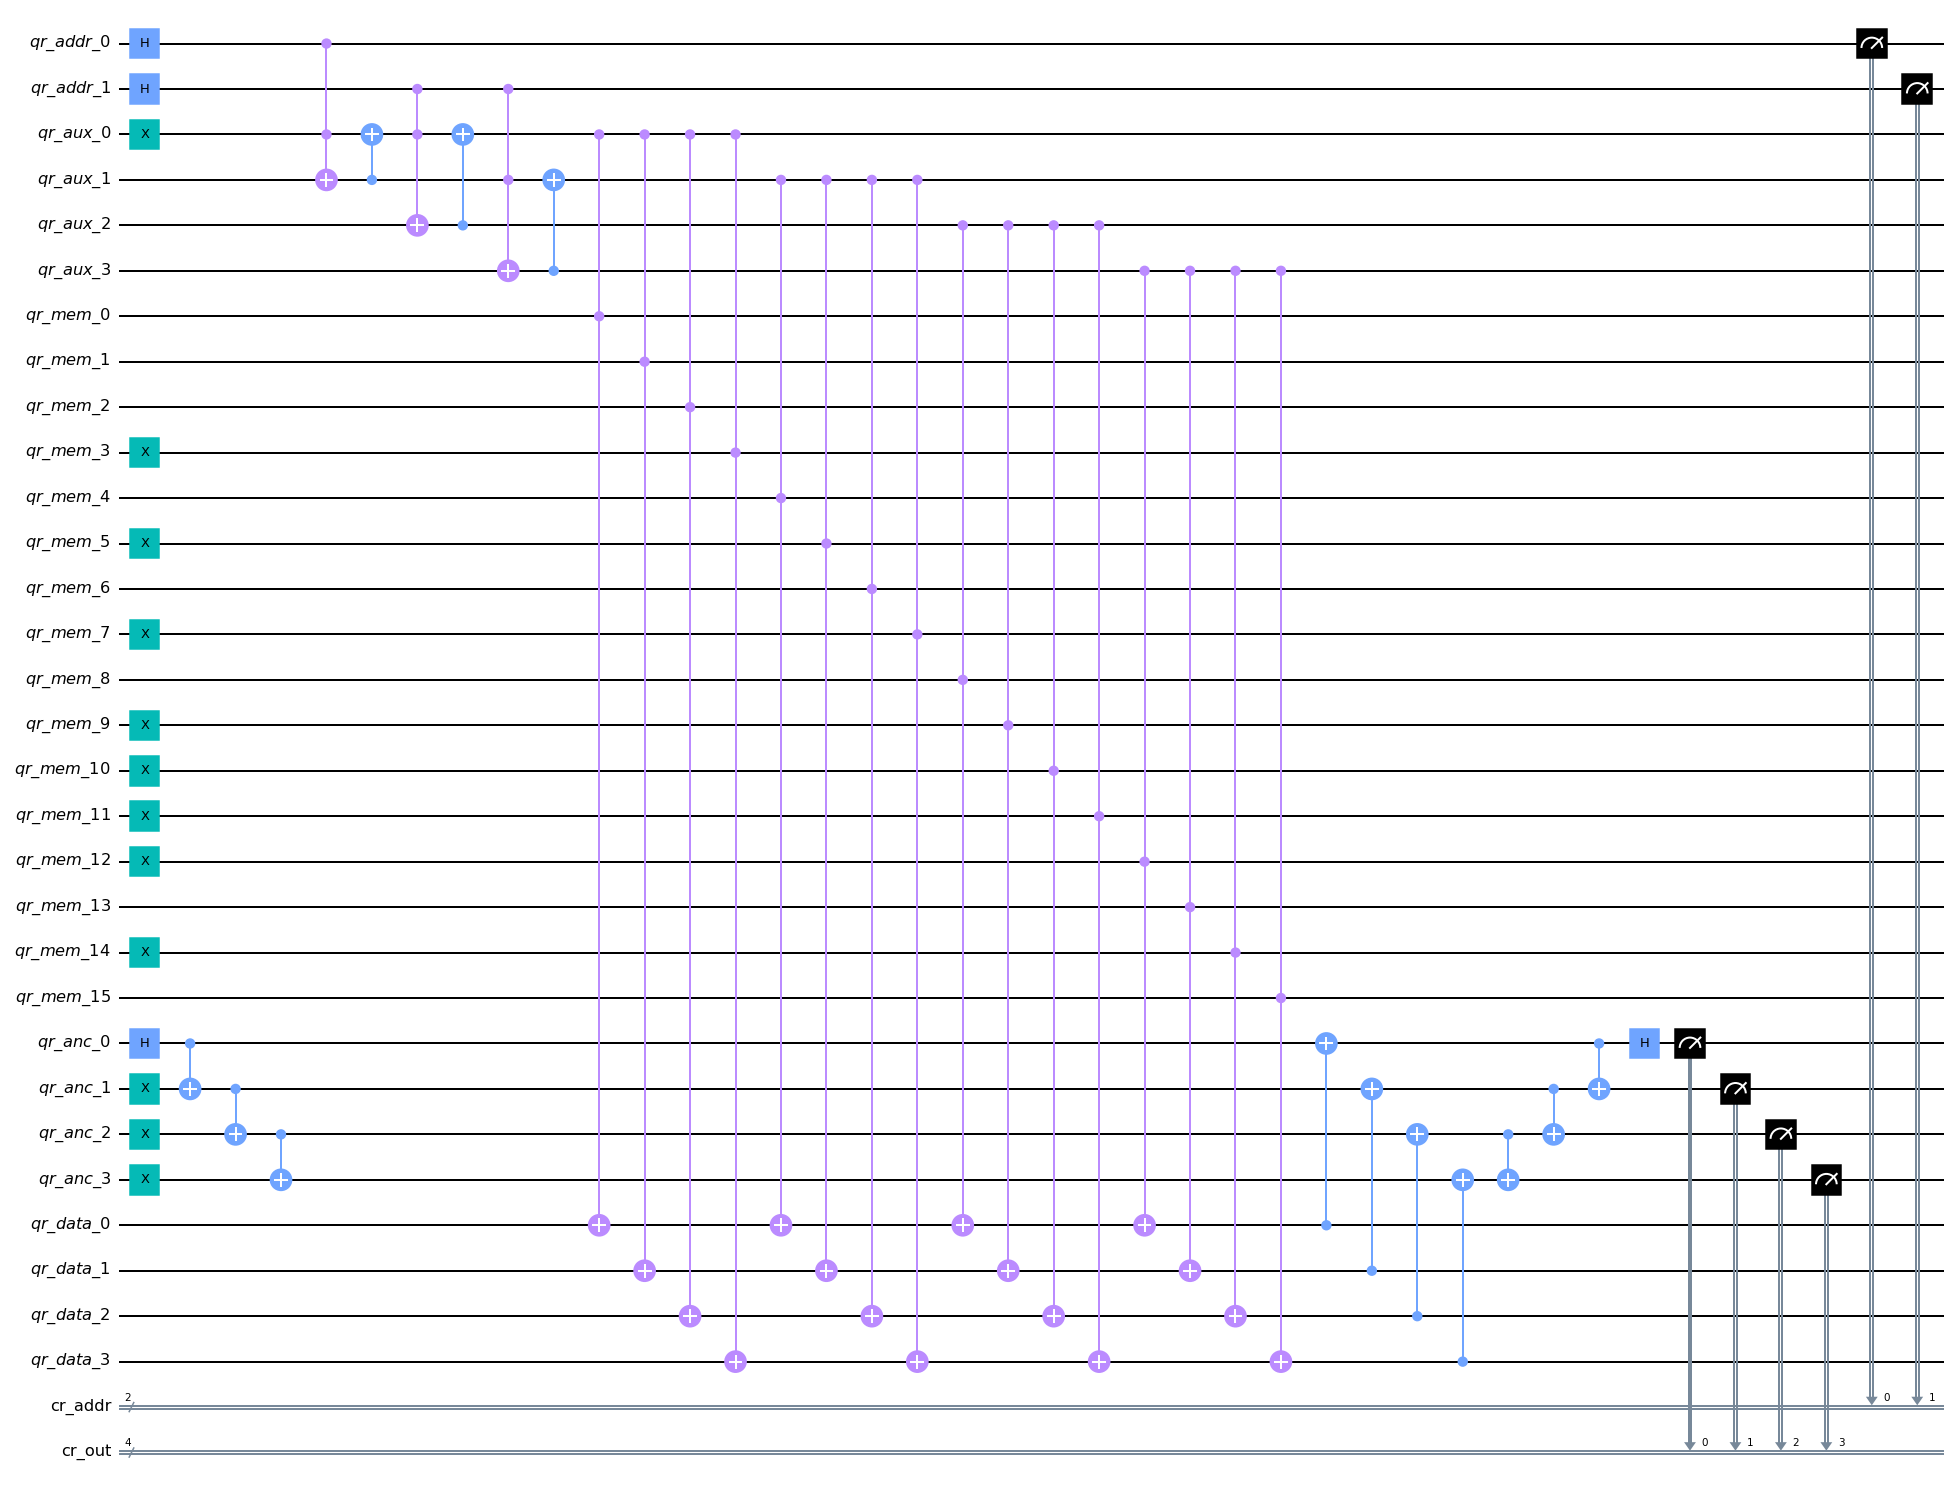

In [11]:
# given_input = [1,5,7,2]
given_input = [1,5,7,10]

"""
We define 4 kinds of registers

qr_addr -- to store the addresses
qr_aux -- auxiliary regiters which are needed to select the input stored at a particular memory address
qr_mem -- the location where the input will be stored. One can access them using the address of the memory. 
qr_data -- location to where the data will be copied when we query a particular stored value in memory registers using its address. 
qr_anc -- registers needed for processing the data 

"""

# number of qubits in the address registers.
nq_addr = num_qubits_needed_to_represent(given_input)

# number of qubits in the auxiliary registers
nq_aux =  2**nq_addr

# string_size -- the size of the bitstring in the inputs
# for example, for the input vector, [1,5,4,2], the binary representation is: [001,101,100,010]. 
# so, the size of the string is 3. 

string_size = input_string_size(given_input)
print('The size of the input data element  when we represent them in binary form is:', string_size)

# number of qubits in the memory registers.
nq_mem = string_size*2**nq_addr

# number of qubits in the data registers. 
nq_data = string_size

# number of qubits in the ancilla registers.
nq_anc = string_size 


# defining classical registers for the address and output registers
cr_addr = ClassicalRegister(nq_addr, 'cr_addr')
cr_out = ClassicalRegister(nq_anc, 'cr_out')


print('number of qubits corresponding to registers corresponding to \n address is:', nq_addr, '\n aux is:', nq_aux, '\n memory is:', nq_mem, '\n data is:', nq_data, '\n ancilliary is:', nq_anc)

# defining the quantum registers 
qr_addr = QuantumRegister(nq_addr, 'qr_addr')
qr_aux = QuantumRegister(nq_aux, 'qr_aux')
qr_mem = QuantumRegister(nq_mem, 'qr_mem')
qr_data = QuantumRegister(nq_data, 'qr_data')
qr_anc = QuantumRegister(nq_anc, 'qr_anc')


# defining the circuit and adding all the registers
qcirc = QuantumCircuit(qr_addr, cr_addr)
qcirc.add_register(qr_aux)
qcirc.add_register(qr_mem)
qcirc.add_register(qr_anc)
qcirc.add_register(qr_data)
qcirc.add_register(cr_out)
 

""" Loading the input data to the memory registers """
# Create an array of input data
qubit_init_mem_array = int_2_bin(given_input)

# initialization of memory registers
for input_idx in range(len(qubit_init_mem_array)):
  load_single_input(qubit_init_mem_array[input_idx], qcirc, qr_mem[input_idx*string_size : (input_idx + 1) * (string_size)])

""" Initializing the address registers """
# Create a superposition of entire hilbert space corresponding to the addresses
for i in range(nq_addr):
  qcirc.h(qr_addr[i])

# Set the first qubit in the auxillary register as 1. Needed to load and copy the data from memory registers to data registers correspond to its address.
qcirc.x(qr_aux[0])

# Create equal superpostion of the string that we are searching. 
# For eg: 
# In the case of 2 qubits, it correponds to (01+10)/np.sqrt(2)
# In the case of 3 qubits, it correponds to (010+101)/np.sqrt(2) etc.

for str_idx in range(string_size):
  if str_idx==0:
    qcirc.h(qr_anc[str_idx])
  else:
    qcirc.x(qr_anc[str_idx])

for str_idx in range(string_size-1): 
  qcirc.cx(qr_anc[str_idx], qr_anc[str_idx+1])

qcirc.barrier()

# The circuit for selecting the data from the memory registers

for i in range(nq_addr):
  for j in range(2**i):
      qcirc.ccx(qr_addr[i], qr_aux[j], qr_aux[2**i+j])
      qcirc.cx(qr_aux[2**i+j], qr_aux[j])

# The circuit for loading the data from the memory registers to data registers

for k in range(nq_aux):
  for l in range(string_size):
    qcirc.ccx(qr_aux[k], qr_mem[l+string_size*k], qr_data[l])

  qcirc.barrier()

# loading the data from the data registers to the ancilliary register for processing the quantum information
for m in range(string_size):
  qcirc.cx(qr_data[m], qr_anc[m])
qcirc.barrier()

# to convert GHZ states to |00..0>. This corresponds to the solution we are looking for. 
"""
In other words, finding the solution involves 3 steps:
1. perform measurements on the all the qubits corresponds to the registers qr_addr and qr_anc. 
2. collect the measurement statistics and do the post-processing step which involves 
   keeping all the measurement outcomes correponding to qubits in qr_anc all being in 0 state, i.e |00..00>
3. the state of qubits in the qr_addr register corresponds to the solution. 
   eg:  the measurement outcomes on the qubits corresponding to [qr_anc, qr_addr] are {'0000 01': 525, '0000 11': 500, '0110 00': 491, '1100 10': 484}
        so, the required solutions are the bits corresponding to the qr_anc = 0000, which is 01 and 11

Note: One can apply a multi qubit control gate on the qubits in the qr_anc register, and introduce an extra ancilla 
      by keeping it as the target, in such a way that, only when all the qubits are down (or 0) the target ancilla measurement outcome would be 1. 
      So, in this scenerio, one needs to perform measurement on the (qr_addr + the newly introduced ancilla qubit).
      All the outcomes on the qr_addr which correponds to a qr_anc_extra = 1 are the required solutions.
      However, I couldn't implement this as there is a bug in the qiskit library inbuilt function which throws me an error, which should be reported. 
"""

for str_idx in range(string_size-1,0,-1): 
  qcirc.cx(qr_anc[str_idx-1], qr_anc[str_idx])
qcirc.h(qr_anc[0])
qcirc.barrier(qr_anc)


"""  below is the code snippet for the implementation """
"""
for 4 qubits 
"""
# multi_control_gate = C4XGate() # for 4 qubits
# multi_control_gate = MCMT('x', num_ctrl_qubits= nq_anc-1, num_target_qubits=1) #a generic fucntion

# for i in range(nq_anc-1):
#   qcirc.x(qr_anc[i])
# qcirc.append(multi_control_gate, qr_anc)
# for i in range(nq_anc-1):
#   qcirc.x(qr_anc[i])


qcirc.barrier()
qcirc.measure(qr_anc, cr_out)
qcirc.measure(qr_addr, cr_addr)


# Circuit diagram representation 
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(qcirc, output='mpl', plot_barriers= False, interactive = True, fold = 50)


In [13]:
backend = qiskit.Aer.get_backend('aer_simulator')
shots = 2000
job = execute(qcirc, backend = backend, shots = shots)
job.result().get_counts()

# the solutions corresponds to the qr_anc registers having all 0's. 

{'0000 01': 523, '0000 11': 497, '0110 00': 506, '1100 10': 474}

In [ ]:
# implementing a multi control gate using qiskit library in-built fnctions. 
from qiskit import QuantumCircuit

noancilla = QuantumCircuit(5)
noancilla.h(4)  # H on target qubit
noancilla.mcx([0, 1, 2, 3], 4, mode='noancilla')
noancilla.h(4)  # again H on target qubit
noancilla.draw()

q_0: ───────■───────
            │       
q_1: ───────■───────
            │       
q_2: ───────■───────
            │       
q_3: ───────■───────
     ┌───┐┌─┴─┐┌───┐
q_4: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘